A digital image is composed of a finite number of elements, each of which has a particular location and value. An image is defined  as  a  two-dimensional  function  i.e,  a  matrix  A  (x,y) where  x  and  y  are  spatial  coordinates. The  amplitude  of  A  at any pair of coordinates (x,y) is called the intensity or gray level of  the  image  at  that  point.  The  finite  elements  of  image  are referred  to  as picture  elements,  image  elements  or  pixels.  An image  can  be  converted  into  digital  form  by  digitizing  its coordinates  as  well as  amplitude.  The  digitization  of  the coordinate  values  is  called  sampling  whereas  digitizing  the amplitude values is called quantization.

The steps involved in compression are: 
1. Digitizing  of  the  original  image  into  the  array  of numbers, p. 
2. Decomposing the signal ‘p’ into sequence of wavelet coefficients, w. 
3. Applying the threshold to wavelet coefficients w so as to convert it into a new sequence of coefficients, w. 
4. Applying  quantization  to  sequence w in  order  to convert it into new sequence, s. 
5. Compression of sequence using entropy encoding. 
6. Wavelet reconstruction using the original approximation   coefficients   of   level N and   the modified detail coefficients of level from 1 to N. 

In wavelet transform, a function S(x) is represented as a superposition of a set of such wavelets or basis functions. These basis  functions  are  obtained  from  a  single  prototype  wavelet called  the  mother  wavelet  ψ(x)  by  dilations(scaling)  and translations(shifts). 

For each n,k ∈ Z, we define ψn,k(x) as  ψn,k(x) = 2n/2ψ(2nx−k) 
ψ(x)  is  a  wavelet  and  the  collection  {ψn,k(x)}  n,k∈Z  is  a wavelet orthonormal basis on R and  ψ must satisfy ∫ ψ(x)dx =0.  

Basic types of wavelets are 
1. Haar wavelet transform. 
2. Daubechies wavelet transform.  
3. Symlet wavelet transform.  
4. Biorthogonal wavelet transform.  
5. Coiflets wavelet transform. 

The  Daubechies  wavelets  are  orthogonal and so are Coiflets. Symlets have the property of being close to symmetric. The  biorthogonal  wavelets are  not orthogonal  but possess the symmetric property. 

EZW  encoder  is  normally  employed  in  conjunction  with  the wavelet  transform.  After  the  image  is  passed  through  filter bank, it encodes the decomposed image 
WDR is used to generate an embedded bit stream. It consists of 3 basic steps: Discrete Wavelet Transform, Differential Coding and  Binary  coding.


References:
Wavelet Based Image Compression Techniques: Comparative Analysis and Performance Evaluation. 


The Haar transform is the simplest orthogonal wavelet transform. It is computed by iterating difference and averaging between odd and even samples of the signal. Since we are in 2-D, we need to compute the average and difference in the horizontal and then in the vertical direction. 

https://journals.sagepub.com/doi/full/10.1177/0020294019877508


[64.  2.  3. 61. 60.  6.  7. 57.]
[ 9. 55. 54. 12. 13. 51. 50. 16.]
[17. 47. 46. 20. 21. 43. 42. 24.]
[40. 26. 27. 37. 36. 30. 31. 33.]
[32. 34. 35. 29. 28. 38. 39. 25.]
[41. 23. 22. 44. 45. 19. 18. 48.]
[49. 15. 14. 52. 53. 11. 10. 56.]
[ 8. 58. 59.  5.  4. 62. 63.  1.]


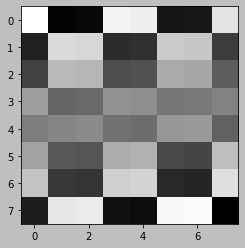

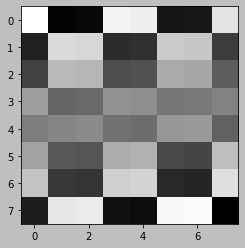

In [1]:
from numpy import mean, cov, cumsum, dot, linalg, size, flipud, real, transpose, array, log2, shape
import cv2 as cv
from functools import reduce
from matplotlib import pyplot as plt

test = array([array([64, 2, 3, 61, 60, 6, 7, 57]), array([9, 55, 54, 12, 13, 51, 50, 16]), 
             array([17, 47, 46, 20, 21, 43, 42, 24]), array([40, 26, 27, 37, 36, 30, 31, 33]),
             array([32, 34, 35, 29, 28, 38, 39, 25]), array([41, 23, 22, 44, 45, 19, 18, 48]),
             array([49, 15, 14, 52, 53, 11, 10, 56]), array([8, 58, 59, 5, 4, 62, 63, 1])])

# img = cv.imread('182910.jpg') 
    
def simple_compression(image_matrix):
    compressed_matrix = array(list(map(lambda x:list(map(lambda i:sum(x[i:i + 2])/2, range(0, 256, 2))), array(list(map(lambda x:list(map(lambda i:sum(x[i:i + 2])/2, range(0, 256, 2))), mean(image_matrix, 2)))).transpose()))).transpose()
    return compressed_matrix

#####
# НЕ СМОТРИТЕ НА МОЙ ГОВНОКОД ПОЖАЛУЙСТА, ПОСМОТРИТЕ ДРУГИЕ НОУТБУКИ
#####

def wavelet_transform(image_matrix_row):
    averages = [list(image_matrix_row)]
    differences = []
    for i in range(int(log2(shape(image_matrix_row)))):
        new_avg = []
        new_dif = []
        for k in range(0, len(averages[-1]), 2):
            avg = sum(averages[-1][k:k + 2])/2
            if i == int(log2(shape(image_matrix_row))) - 2:
                value = avg
            new_avg.append(avg)
            new_dif.append(averages[-1][k:k + 2][0]-avg)
        differences.insert(0, new_dif)
        averages.append(new_avg)
    return(reduce(lambda z, y :z + y, [[value,], reduce(lambda z, y :z + y, differences)]))

def reverse_wavelet_transform(wavelet_transform_matrix_row):
    retransformed = list(wavelet_transform_matrix_row)
    for i in range(1, int(log2(shape(wavelet_transform_matrix_row)[0]))+1):
        if i == 1:
            retransformed.insert(0, (retransformed[i-1] + retransformed[i]))
            retransformed = retransformed[:2]
        else:
            length = len(retransformed)
            for k in range(length):
                retransformed.append(retransformed[k] + wavelet_transform_matrix_row[length:length*2][k])
                retransformed.append(retransformed[k] - wavelet_transform_matrix_row[length:length*2][k])
            retransformed = retransformed[length:]
    return(retransformed)
        
wavelet1d = list(map(wavelet_transform, list(test)))
wavelet2d = list(array(list(map(wavelet_transform, array(wavelet1d).transpose()))).transpose())
    
wavelet_reverse_1d = list(map(reverse_wavelet_transform, list(wavelet2d)))
wavelet_reverse_2d = list(array(list(map(reverse_wavelet_transform, array(wavelet_reverse_1d).transpose()))).transpose())

for i in wavelet_reverse_2d:
    print(i)
    
    
# reverse_wavelet_transform([32.5, 0, 0.5, 0.5, 31, -29, 27, -25])
    
plt.style.use('grayscale')
# img = simple_compression(img)   
plt.imshow(test)
plt.show() 
plt.imshow(wavelet_reverse_2d)
plt.show() 